In [36]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mandates

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn import linear_model

from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential

In [38]:
df = pd.read_csv("NFLX.csv")
df.head()
df.shape

(1009, 7)

<Axes: >

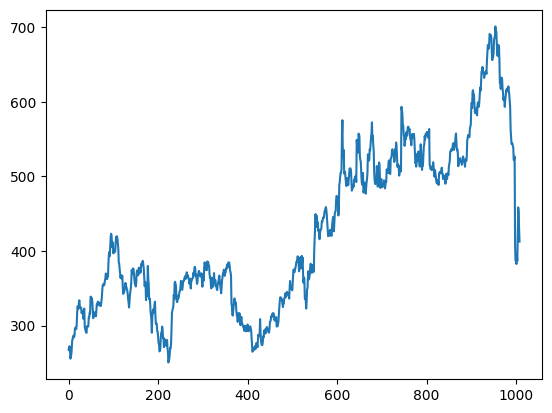

In [39]:
df['High'].plot()

In [40]:
# extracting features from the dataset
features = ['Open', 'High', 'Low', 'Close']

In [42]:
output_var = pd.DataFrame(df['Adj Close'])

In [41]:
# Scaling the csv values down to cut down on memory consumption 
scaler = MinMaxScaler()
feature_tf = scaler.fit_transform(df[features])
feature_tf = pd.DataFrame(columns=features, data=feature_tf, index=df.index)
feature_tf.head()

,Open,High,Low,Close
0,0.061253,0.038304,0.041331,0.044516
1,0.030059,0.035640,0.030273,0.069548
2,0.071243,0.048408,0.072770,0.067015
3,0.072334,0.037683,0.041265,0.035430
4,0.043474,0.011436,0.010729,0.034053


In [43]:
timesplit = TimeSeriesSplit(n_splits=10) 
for train_index, test_index in timesplit.split(feature_tf):
    X_train, X_test = feature_tf[:len(train_index)], feature_tf[len(train_index): (len(train_index)+len(test_index))]
    y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [44]:
trainX = np.array(X_train)
testX = np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [45]:
print(trainX.shape, testX.shape, X_train.shape, X_test.shape)

(918, 4) (91, 4) (918, 1, 4) (91, 1, 4)


In [46]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_absolute_error', optimizer='adam')

In [47]:
model = lstm.fit(X_train, y_train, epochs=150, batch_size=8, verbose=1)

Epoch 1/150
115/115 [==============================] - 3s 4ms/step - loss: 401.3649
Epoch 2/150
115/115 [==============================] - 0s 4ms/step - loss: 400.3410
Epoch 3/150
115/115 [==============================] - 1s 6ms/step - loss: 397.3520
Epoch 4/150
115/115 [==============================] - 1s 5ms/step - loss: 391.7430
Epoch 5/150
115/115 [==============================] - 1s 4ms/step - loss: 383.7451
Epoch 6/150
115/115 [==============================] - 1s 5ms/step - loss: 373.7136
Epoch 7/150
115/115 [==============================] - 1s 5ms/step - loss: 361.9326
Epoch 8/150
115/115 [==============================] - 0s 4ms/step - loss: 348.6070
Epoch 9/150
115/115 [==============================] - 0s 4ms/step - loss: 333.9225
Epoch 10/150
115/115 [==============================] - 0s 4ms/step - loss: 317.9198
Epoch 11/150
115/115 [==============================] - 0s 4ms/step - loss: 300.6823
Epoch 12/150
115/115 [==============================] - 0s 4ms/step - loss

In [48]:
y_pred = lstm.predict(X_test)

3/3 [==============================] - 1s 11ms/step


In [50]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
print(MAE)

4.176644420952096


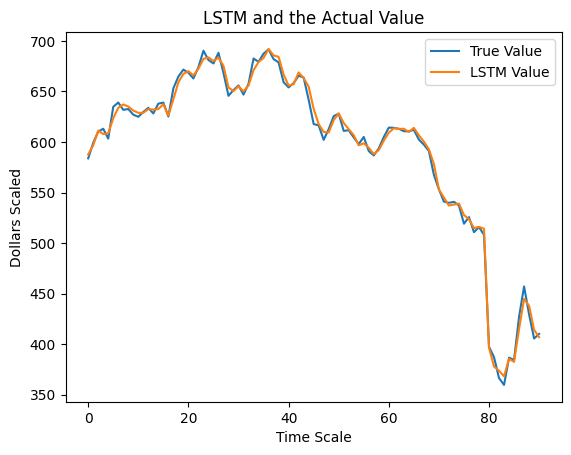

In [51]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("LSTM and the Actual Value")
plt.xlabel('Time Scale')
plt.ylabel('Dollars Scaled')
plt.legend()
plt.show()